## Top Spotify Songs Analysis

This is an exploratory analysis of the data set called "Top Spotify Songs" available on Kaggle: 
https://www.kaggle.com/datasets/arnavvvvv/spotify-music?resource=download

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import os

Importing the dataset:

In [56]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin-1')

The "Top Spotify Songs" dataset contains the most streamed songs on Spotify. Each of those songs contains the following features: 

- track_name - name of the song
- artist(s)_name - name of the artist of the song
- artist_count - number of artists contributing to the song
- released_year - year when the song was released
- released_month - month when the song was released
- released_day - day of the month when the song was released
- in_spotify_playlists - number of spotify playlists the song is included in
- in_spotify_charts - presence and rank of the song on Spotify charts
- streams - total number of streams on Spotify
- in_apple_playlists - number of Apple Music playlists the song is included in
- in_apple_charts - presence and rank of the song on Apple Music charts
- in_deezer_charts - presence and rank of the song on Deezer charts
- in_shazam_charts - presence and rank of the song on Shazam charts
- bpm - beats per minute, a measure of song tempo
- key - key of the song
- mode - mode of the song (major or minor)
- danceability_% - percentage indicating how suitable the song is for dancing
- valence_% - positivity of the song's musical content
- energy_% - perceived energy level of the song
- acousticness_% - amount of acoustic sound in the song
- instrumentalness_% - amount of instrumental content in the song
- liveness_% - presence of live performance elements
- speechiness_% - amount of spoken words in the song

***
##### First look at the dataset:

In [57]:
df.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147,48,113,100,50
streams,141381703,133716286,140003974,800840817,303236322
in_apple_playlists,43,48,94,116,84


In [58]:
 df.shape

(953, 24)

In [59]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [60]:
df['artist(s)_name'].nunique()

645

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [62]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


***

##### Cleaning the data:

In [63]:
df[['streams','in_deezer_playlists','in_shazam_charts']].head()

,streams,in_deezer_playlists,in_shazam_charts
0,141381703,45,826
1,133716286,58,382
2,140003974,91,949
3,800840817,125,548
4,303236322,87,425


It appears that the columns 'streams', 'in_deezer_playlists', and 'in_shazam_charts' should be of a type integer, but are instead of a type object. I want to see whether there is a certain value that is causing this.

In [64]:
non_integer_values = df['streams'].apply(lambda x: isinstance(x, int) or x.isdigit())
non_integer_values = df['streams'][~non_integer_values]
if not non_integer_values.empty:
    print(f"Non-integer values in column '{'streams'}':")
    print(non_integer_values)

Non-integer values in column 'streams':
574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


There appears to be one row of the column 'streams' where the value isn't numeric. As this is an incorrect value, I need to clean it up. As there aren't that many rows in the dataset, and I don't want to loose any information I won't delete the entire row, but will rather replace this incorrect value of the column 'streams' with a mean value. 

In [65]:
df['streams'].loc[574]

'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [66]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df['streams'] = df['streams'].fillna(df['streams'].mean()).astype(int)

In [67]:
#Checking again to make sure that it is okay now:

non_integer_values = df['streams'].apply(lambda x: isinstance(x, int) or x.isdigit())
non_integer_values = df['streams'][~non_integer_values]
if not non_integer_values.empty:
    print(f"Non-integer values in column '{'streams'}':")
    print(non_integer_values)

In [73]:
df[['in_deezer_playlists', 'in_shazam_charts']].loc[40:50]

,in_deezer_playlists,in_shazam_charts
40,6,62
41,843,69
42,537,727
43,247,311
44,65,"1,133"
45,138,102
46,458,332
47,24,259
48,"2,445",140
49,74,16


There seem to be some values in 'in_deezer_playlists' and 'in_shazam_charts' columns that contain commas to separate thousands. I will change this and convert these columns to numeric type.

In [74]:
df['in_deezer_playlists'] =df['in_deezer_playlists'].str.replace(',','')
df['in_shazam_charts'] =df['in_shazam_charts'].str.replace(',','')

In [75]:
df['in_deezer_playlists'].isna().any()

False

In [76]:
df['in_shazam_charts'].isna().any()

True

Changing the missing values in the 'in_shazam_charts' column to '0', so it can be easier visualized and worked with if needed:

In [77]:
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

Changing the types of columns 'streams', 'in_deezer_playlists', and 'in_shazam_charts' to integer:

In [82]:
df['streams'] = df['streams'].astype(str).astype(int)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(str).astype(int)
df['in_shazam_charts'] = df['in_shazam_charts'].astype(str).astype(int)

Checking whether there are any other columns containing missing values:

In [81]:
df.isna().any()

track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts        False
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

In [83]:
df['key'].isna().sum()

95

The 'key' column is the only one that still contains NA values. As this column provides information regarding in which key the song is written, I don't think that filling the missing values with something would be helpful. There is also a big number of values that are NA compared to the whole dataset (around 10%).
Therefore, I will just change the NA values with 'missing' string, so that NA won't interfere with any potential operations:

In [84]:
df['key'] = df['key'].fillna('missing')

In [85]:
df['key'].isna().sum()

0

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139e+00,8.930442e-01,1.000000e+00,1.0,1.0,2.0,8.000000e+00
released_year,953.0,2.018238e+03,1.111622e+01,1.930000e+03,2020.0,2022.0,2022.0,2.023000e+03
released_month,953.0,6.033578e+00,3.566435e+00,1.000000e+00,3.0,6.0,9.0,1.200000e+01
released_day,953.0,1.393075e+01,9.201949e+00,1.000000e+00,6.0,13.0,22.0,3.100000e+01
in_spotify_playlists,953.0,5.200125e+03,7.897609e+03,3.100000e+01,875.0,2224.0,5542.0,5.289800e+04
in_spotify_charts,953.0,1.200944e+01,1.957599e+01,0.000000e+00,0.0,3.0,16.0,1.470000e+02
streams,953.0,3.905171e+08,6.144494e+08,-2.147484e+09,131746175.0,267789608.0,607123776.0,2.135158e+09
in_apple_playlists,953.0,6.781217e+01,8.644149e+01,0.000000e+00,13.0,34.0,88.0,6.720000e+02
in_apple_charts,953.0,5.190871e+01,5.063024e+01,0.000000e+00,7.0,38.0,87.0,2.750000e+02
in_deezer_playlists,953.0,3.851878e+02,1.130536e+03,0.000000e+00,13.0,44.0,164.0,1.236700e+04


***

##### Exploratory Data Analysis:

Visualizing the artists with the most songs in the top Spotify songs:

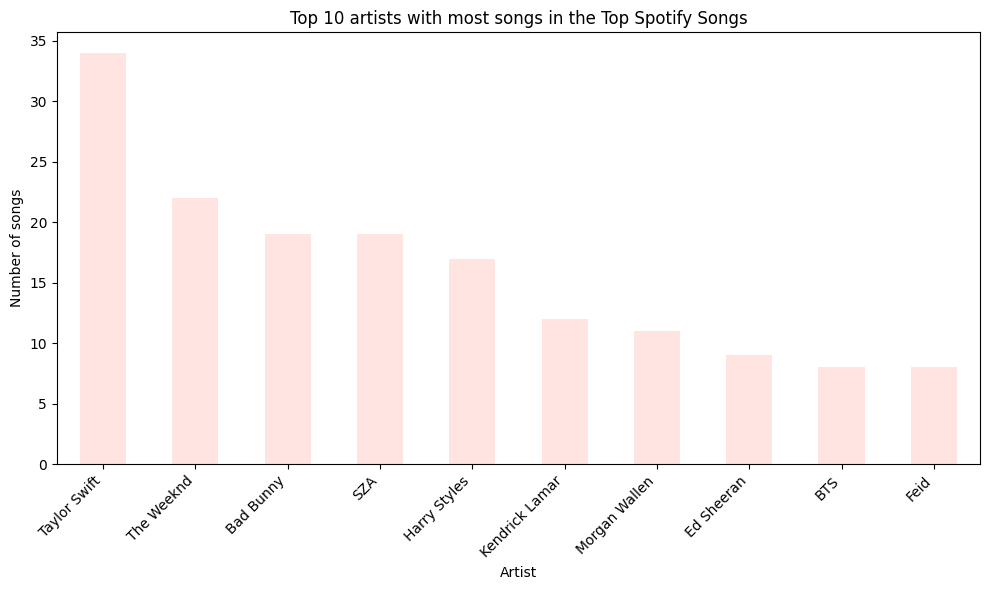

In [92]:
artist_counts = df['artist(s)_name'].value_counts()

plt.figure(figsize=(10, 6))
artist_counts.head(10).plot(kind='bar', color='mistyrose')
plt.title('Top 10 artists with most songs in the Top Spotify Songs')
plt.xlabel('Artist')
plt.ylabel('Number of songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As Taylor Swift's sons are the most prominent in the Top Spotify Songs, I want to see how her songs compare to the songs of other artists when looking at how often they appear in playlists:

In [155]:
taylor_swift_songs = df[df['artist(s)_name'] == 'Taylor Swift']
total_playlists_taylor = taylor_swift_songs[['in_apple_playlists', 'in_deezer_playlists', 'in_spotify_playlists']].sum().sum()

#the songs of other artists
other_artists_songs = df[df['artist(s)_name'] != 'Taylor Swift']
total_playlists_other_artists = other_artists_songs[['in_apple_playlists', 'in_deezer_playlists', 'in_spotify_playlists']].sum().sum()

print("Total playlists for Taylor Swift's songs:", total_playlists_taylor)
print("Total playlists for other artists:", total_playlists_other_artists)

Total playlists for Taylor Swift's songs: 137856
Total playlists for other artists: 5249572


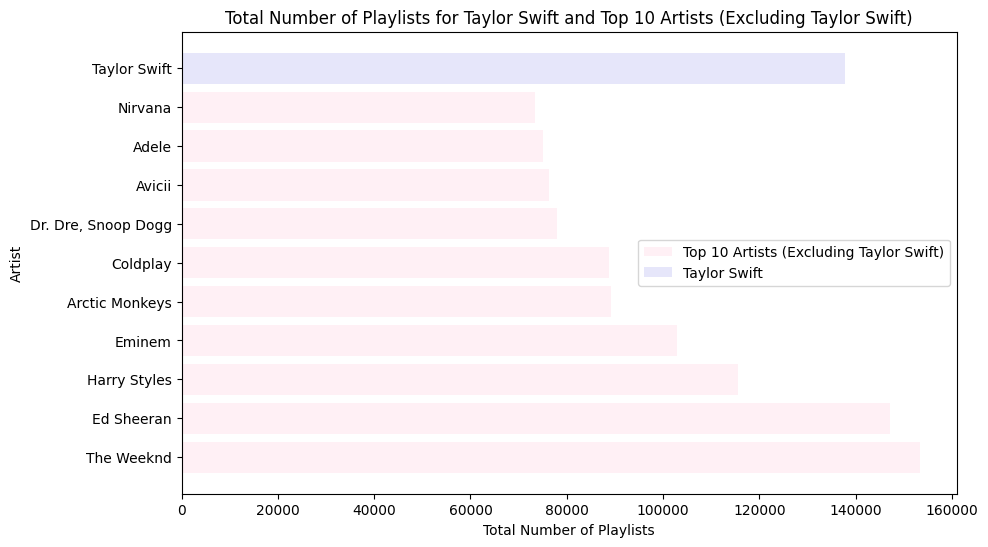

In [159]:
total_playlists_per_artist = df.groupby('artist(s)_name')[['in_apple_playlists', 'in_deezer_playlists', 'in_spotify_playlists']].sum().sum(axis=1)

top_10_artists = total_playlists_per_artist[total_playlists_per_artist.index != 'Taylor Swift'].nlargest(10)

selected_artists = top_10_artists.index.tolist() + ['Taylor Swift']
selected_df = df[df['artist(s)_name'].isin(selected_artists)]

total_playlists_per_artist_selected = selected_df.groupby('artist(s)_name')[['in_apple_playlists', 'in_deezer_playlists', 'in_spotify_playlists']].sum().sum(axis=1)

plt.figure(figsize=(10, 6))
plt.barh(top_10_artists.index, top_10_artists, color='lavenderblush', label='Top 10 Artists (Excluding Taylor Swift)')

# Plot Taylor Swift separately
taylor_swift_playlists = total_playlists_per_artist_selected.loc['Taylor Swift']
plt.barh('Taylor Swift', taylor_swift_playlists, color='lavender', label='Taylor Swift')

plt.xlabel('Total Number of Playlists')
plt.ylabel('Artist')
plt.title('Total Number of Playlists for Taylor Swift and Top 10 Artists (Excluding Taylor Swift)')
plt.legend()
plt.show()


Even though Taylor Swift has the most songs in the Top Songs on Spotify, she doesn't appear in the most playlists across platforms. However, she is still in the top. Comming in the third place after The Weeknd and Ed Sheeran. 

Looking at which month had the most top songs:

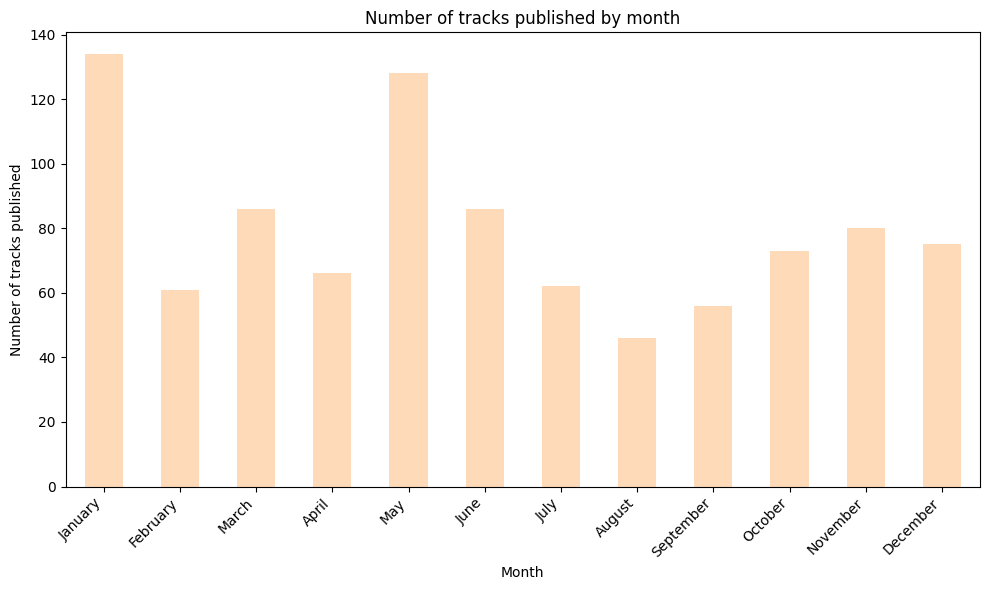

In [107]:
month_counts = df['released_month'].value_counts()

#mapping the months to month names
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
month_counts.index = month_counts.index.map(month_map)
month_counts = month_counts.reindex(month_map.values())

plt.figure(figsize=(10,6))
month_counts.plot(kind='bar', color='peachpuff')
plt.title('Number of tracks published by month')
plt.xlabel('Month')
plt.ylabel('Number of tracks published')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualizing which words from the song titles appear the most:

In [140]:
stopwords_file='C:/Jana/DS Projects/Top Spotify Songs/english'

In [141]:
with open(stopwords_file, 'r') as file:
    stop_words = set(file.read().splitlines())

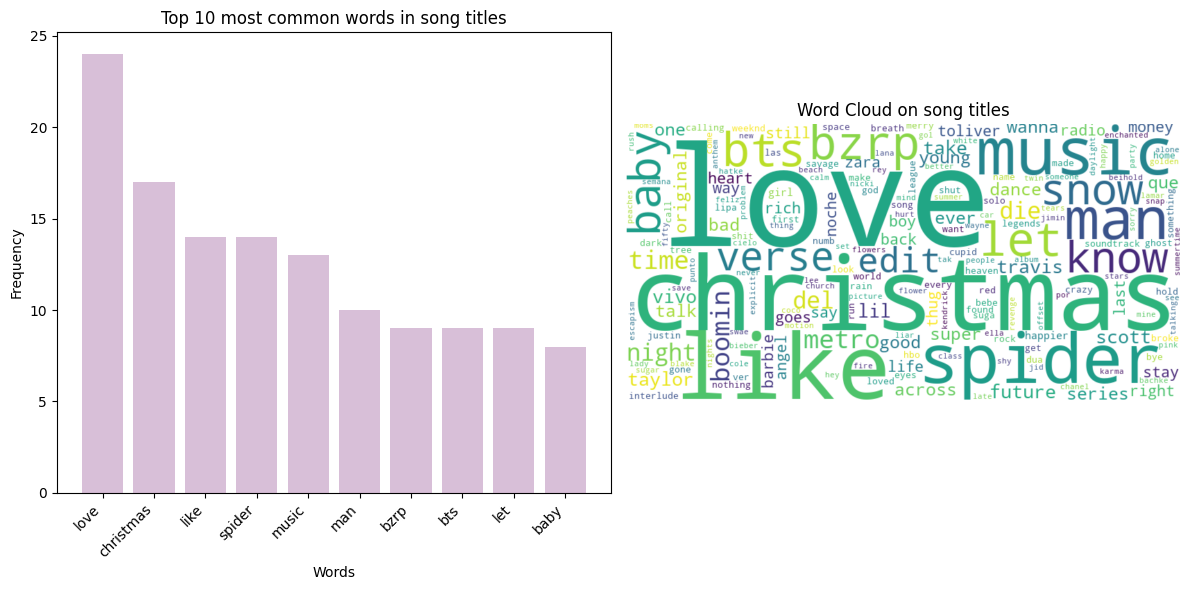

In [153]:
all_titles = ' '.join(df['track_name'])
#tokenizing the string into words and removing all non-alphabetical characters
words = re.findall(r'\b[a-zA-Z]+\b', all_titles.lower())
#removing the stop words to get a more accurate representation of the most common words
#also removing any words that are shorter than 3 characters
filtered_words = [word for word in words if word not in stop_words and len(word) >=3]
#removing the words like 'feat' and 'vol' as they don't have much to do with the actual title
filtered_words = [word for word in filtered_words if word.lower() not in ['feat', 'vol', 'remix', 'version', 'sessions', 'remastered']]
word_counts = Counter(filtered_words)

#only looking at the top 10 words
top_n = 10 
top_words = dict(word_counts.most_common(top_n))

#plotting the bar plot and word cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_words.keys(), top_words.values(), color ='thistle')
plt.title('Top 10 most common words in song titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud on song titles')
plt.axis('off')

plt.tight_layout()
plt.show()

After removing the words that aren't exactly the title of the song, such as 'feat' or 'remix'. It can be seen from this visualization it can be seen that the first most common word is 'love' which was expected, and the second most common is 'Christmas' which correlates with the songs from January being the most prominent.
I am suprised to see the word 'spider' on this list.

In [154]:
print(df[df['track_name'].str.contains('spider', case=False)])

                                            track_name  \
41       Sunflower - Spider-Man: Into the Spider-Verse   
135  Calling (Spider-Man: Across the Spider-Verse) ...   
200  Annihilate (Spider-Man: Across the Spider-Vers...   
208  Self Love (Spider-Man: Across the Spider-Verse...   
214  All The Way Live (Spider-Man: Across the Spide...   
238  Link Up (Metro Boomin & Don Toliver, Wizkid fe...   
248                     Danger (Spider) (Offset & JID)   

                                        artist(s)_name  artist_count  \
41                               Post Malone, Swae Lee             2   
135  Swae Lee, A Boogie Wit da Hoodie, Metro Boomin...             4   
200          Swae Lee, Lil Wayne, Offset, Metro Boomin             4   
208                            Metro Boomin, Coi Leray             2   
214                 Future, Lil Uzi Vert, Metro Boomin             3   
238     WizKid, Toian, Metro Boomin, Don Toliver, Beam             5   
248                            

After this examination it makes more sense why the word 'spider' is so often as it relates to the songs from the movie 'Spider-Man'. Yet another word that relates to information about the song, rather than the song title itself. 

There are more words that could be removed that don't relate to the song title, but rather to the featuring artists, or the way the song was recorded. Also, the words could be reduced to their core meaning to get the more accurate depiction.

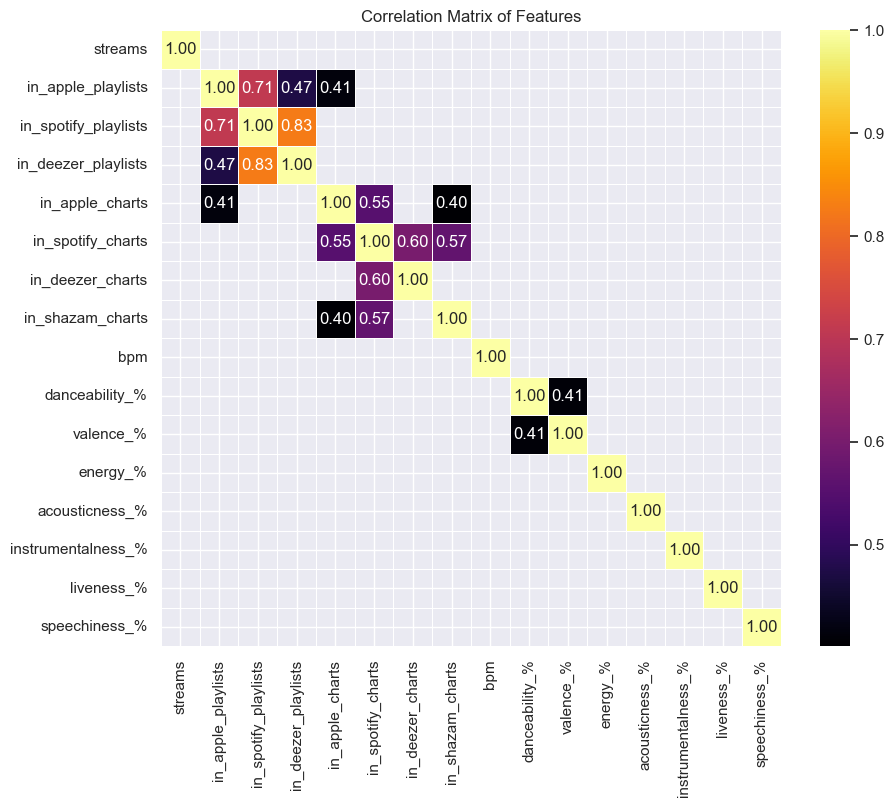

In [184]:
correlation_matrix = df[['streams','in_apple_playlists','in_spotify_playlists','in_deezer_playlists','in_apple_charts','in_spotify_charts','in_deezer_charts','in_shazam_charts','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']].corr(method='pearson')

threshold = 0.4

correlation_matrix_masked = correlation_matrix.mask(correlation_matrix < threshold)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_masked, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

Songs that end up in playlists on Spotify tend to be included in playlists on Deezer, and Apple as well. Also, songs that perform well on one platform tend to perform well on all platforms. 
Positivity of the song (valence) tends to be correlated with the song's danceability.